<h2> Bioinformatyka2 - kurs mały. Ćwiczenie1

W poniższym ćwiczeniu poznamy wybrane metody związane z analizą sekwencji oraz biologicznymi bazami danych. Część zadań będzie zrealizowana przy pomocy języka Python. 

In [1]:
import numpy as np #biblioteka do operacji na wektorach, macierzach, funkcje matematyczne itd..
import matplotlib.pyplot as plt #biblioteka do rysowania
import random as r #modul do generowania liczb losowych itp

<h3> Entropia

Entropia (w teorii informacji) - średnia ważona ilości informacji niesionej przez pojedynczą wiadomość, gdzie wagami są prawdopodobieństwa nadania poszczególnych wiadomości (Shannon, 1948):


<h1><center>$ H = -(p_1 \log_2 p_1 + p_2 \log_2 p_2 + ... + p_n \log_2 p_n)$</center></h1>

<h4> Przykład: Dane są sekwencje aminokwasowe. W tej sytuacji mamy do czyniania z 4 różnymi stanami (nukleotydy). Niech $p_A$, $p_G$, $p_C$ oraz $p_T$ oznaczają kolejno prawdopodobieństwo wystąpienia $A,G,C$ oraz $T$. Jaka jest maksymalna i minimalna wartość entropii w tym przypadku? Jakim sytuacjom to odpowiada?

<h3><center>$ H = -(\frac{1}{4} \log_2 \frac{1}{4}+\frac{1}{4} \log_2 \frac{1}{4}+\frac{1}{4} \log_2 \frac{1}{4}+\frac{1}{4} \log_2 \frac{1}{4}) = 2$</center></h3>  (maksymalna niepewność)

In [2]:
H = -(1/4*np.log2(1/4)+1/4*np.log2(1/4)+1/4*np.log2(1/4)+1/4*np.log2(1/4))
print(H)

2.0


In [3]:
#lub krócej
H = -(1/4*np.log2(1/4)*4)
print(H)

2.0


<h3><center>$ H = -(1 \log_2 1+0 \log_2 0+0 \log_2 0+0 \log_2 0 ) = 0$</center></h3>

(brak niepewności)

Przyjmując $0\log_20 = 0$ (jest to uzasadnione bo $x\log_2x \rightarrow 0$ gdy $x \rightarrow 0^+$) mamy $H = 0$ (brak niepewności).

<h4> Zadanie1: Wyznacz maksymalną i minimalną wartość entropii dla sekwencji aminokwasowych. Wyjaśnij jakiego typu sekwencjom odpowiadają te wartości?

Logo sekwencji stanowi graficzna prezentacja podsumowania dopasowania wielosekwencyjnego. Zawiera informacje o częstości reszt na każdej pozycji oraz ich konserwatywności. Częstość reszt przedstawia wzajemna relacja wysokości liter, natomiast konserwatywność prezentowana jest jako różnica entropii maksymalnej oraz entropi uzyskanej dla danej pozycji.

<h4> Zadanie2. Będziemy analizować 16 sekwencji proteaz bakteryjnych. Centrum katalityczne tych proteaz obejmuje 3 reszty aminokwasowe: serynę (S), histydynę (H) i kwas asparaginowy (D).

- Wykonaj dopasowanie tych sekwencji (https://www.ebi.ac.uk/jdispatcher/msa/clustalo)

- Uzyskane dopasowanie wykorzystaj do wygenerowania tzw. logo sekwencji. (http://weblogo.threeplusone.com/create.cgi)
    
- W bazie UniProt (https://www.uniprot.org/) wyszukaj sekwencję Q9AER6 (po ID) i odszukaj miejsca występowania 3 reszt z centrum katalitycznego. Zlokalizuj je na dopasowaniu wszystkich 16 sekwencji - na dopasowaniu oraz/lub logo. Czy w przypadku pozostałych sekwencji obserwujemy konserwatywność na tych pozycjach w dopasowaniu?

- Na podstawie dopasowania sekwencji i/lub wygenerowanego logo, podaj prawdopodobne miejsca występowania tych reszt dla F4HL71. Porównaj te wyniki z informacjami w bazie UniProt. Skomentuj otrzymane wyniki.
    

<h3> Badanie składu i szukanie wzorców w sekwencjach biologicznych

- Generowanie losowej sekwencji 

In [4]:
#Model1. Pozycje są niezależne
def random_seq(length, dist):
    '''Funkcja zwraca losową sekwencje o zadanej dlugosci i zadanej czestosci liter alfabetu'''
    distT = []
    h = 0
    for (k, v) in dist.items():
        h += v
        distT.append((k,h))
    s = ''
    for x in range(length):
        ran = r.random()
        for k,v in distT:
            if ran <= v:
                s+=k
                break
    return s

##############przyklad
dist = {'A':0, 'C':1/3,'G':1/3,'T':1/3}
seq = random_seq(10, dist) #podajemy długość sekwencji, tutaj 10
##############
print(seq)

TTTGCTGTTT


In [5]:
#Model2. Bieżący nukleotyd jest zależny od wcześniejszego (model Markowa rzędu 1):
def random_seq2(length, nuc, firstN, trans):
    '''Funkcja zwraca losowa sekwencje o zadanej dlugosci i zadanej macierzy przejsc'''
    s_losowa = ''
    for i in range(length):
        if i>0:
            s_losowa+=np.random.choice(nuc, 1, p=trans[s_losowa[-1]])[0]
        else:
            s_losowa+=np.random.choice(nuc, 1, p=firstN)[0]
    return s_losowa

nuc = ["A","C","G","T"]
trans = {} #macierz przejsc (mozemy zablokowac lub wzmocnić pewne przejścia, w przykladzie ponizej nie będzie sekwencji CA)

####################przyklad
#              "A",  "C",  "G",  "T"
trans['A'] = [1/3,   1/3,  1/3,    0]
trans['C'] = [0.25, 0.25, 0.25, 0.25]
trans['G'] = [0.25, 0.25, 0.25, 0.25]
trans['T'] = [0.25, 0.25, 0.25, 0.25]

firstN = [0.25, 0.25, 0.25, 0.25] #pierwszy nukleotyd będzie zupelnie losowy
seq = random_seq2(100, nuc, firstN, trans)  #podajemy dlugosc sekwencji, tutaj 100
#####################
print(seq)

CCTTCGGCCCGTGAACCAGCCAACTTCCTCGTTTTAGCCTAGCTCTGGCCGTGTCTACCCAAGTAGACTGCTTCGAGGCGGCACAGACCCGAGGCTAACC


 - Proste statystyki dla sekwencji

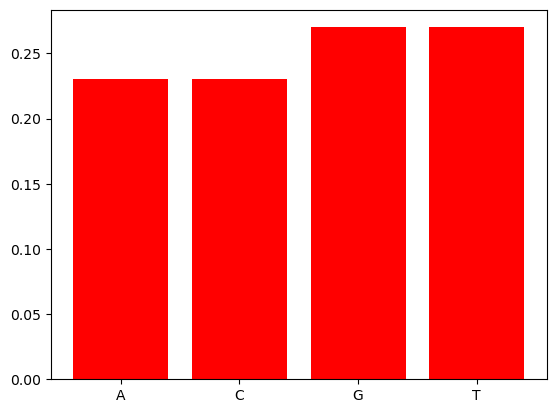

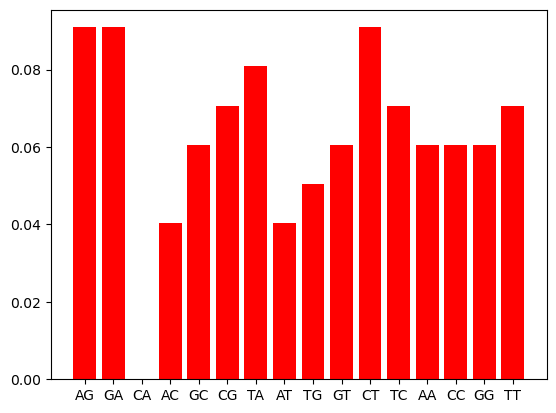

In [6]:
#Wyznaczanie częstosci nukleotydów i dinukleotydów dla zadanej sekwencji 
################################
seq = 'TGACCCCGGTTAAGAGCTAAGATCGCTTTAGGCGTTGGCGAAGTATCCTCTACGTCCTTCGGGAGAAAAGCTGTAGAGGTATCGCTTACTGATTGACTCC'
################################


letters = {'A':0, 'C':0, 'G':0, 'T':0}
diplets = {'AG':0, 'GA':0, 'CA':0, 'AC':0, 'GC':0, 'CG':0, 'TA':0,'AT':0,'TG':0, 'GT':0,'CT':0,'TC':0, 'AA':0, 'CC':0, 'GG':0, 'TT':0}

n = len(seq)-1
for i in range(n):
    letters[seq[i]]+=1
    diplets[seq[i:(i+2)]]+=1
letters[seq[n]]+=1


sumL = sum(letters.values())
norL = {k:v/sumL for k,v in letters.items()}
sumD = sum(diplets.values())
norD = {k:v/sumD for k,v in diplets.items()}

#wizuzalizacja dla nukleotydow
height_norL = norL.values()
bars = norL.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norL,color="red")
plt.xticks(y_pos, bars)
plt.show()

#wizuzalizacja dla dinukleotydow
height_norD = norD.values()
bars = norD.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norD,color="red")
plt.xticks(y_pos, bars)
plt.show()

- Reprezentacja gry chaosu

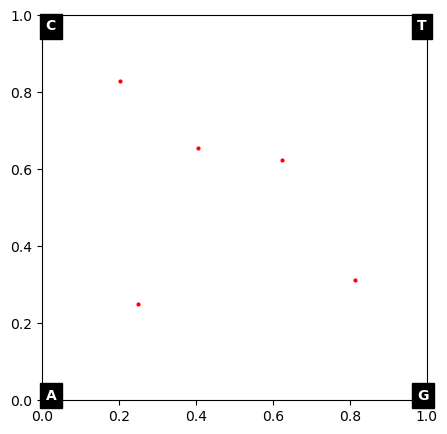

In [7]:
################przykład
seq = "ATGCC"
#######################

def CGR(seq):
    '''Funkcja wyznacza tzw. reprezentację gry chaosu dla danej sekwencji'''
    d = np.array([[0.5,0.5]])
    nt= ["A","C","G","T"]
    coordinates = np.array([[0,0],[0,1],[1,0],[1,1]])
    sequence = []
    for i in range(len(seq)):
        x=0.5*(d[len(d)-1]+coordinates[nt.index(seq[i])])
        sequence.append((x[0],x[1]))
        d = np.vstack((d, x))
    return np.array(sequence)

#przykladowe wywolanie tej funkcji i wizualizacja
p1 = CGR(seq) #wykorzystuje funckje CGR, trzeba ją tez załączyc do kodu

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.scatter(p1[:,0],p1[:,1],c = "red", s = 4, label = "CGR")
#plt.scatter([0.5],[0.5])
ax.text(0.01, 0.03, 'A', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.01, 0.99, 'C', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.03, 'G', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.99, 'T', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')

plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig("obrazek.png", dpi=300) #Jak chcemy zapisac do pliku to odkomentowac (skasować # na początku)
plt.show()

<h4> Zadanie3. Wygeneruj sekwencję losową o długości 10000, w której nie ma A. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR). Załącz wykresy do sprawozdania.

<h4> Zadanie4. Wygeneruj sekwencję losową o długości 10000, w której nie ma podsekwencji AG. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR). Załącz wykresy do sprawozdania.

<h4> Zadanie5. Wygeneruj sekwencję losową o długości 10000, w której nie ma podsekwencji AT. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR). Załącz wykresy do sprawozdania.

<h4> Zadanie6. Wykonanaj analogicznie obliczenia dla genomu mitochondrialnego ryby (https://www.ncbi.nlm.nih.gov/nuccore/NC_009057.1/, sekwecja znajduje się poniżej). Załącz wykresy do sprawozdania. Skomentuj pokrótce otrzymane wyniki.

In [8]:
#NCBI ID: NC_009057.1

seq = "GCTAGCGTAGCTTAACTAAAGCATAACACTGAAGATGTTAAGACGGACCCTAGAAAGGCCCCGTAAGCACAAAGGCTTGGTCCTGACTTTACTGTCAGCTTTGGCTAAACTTACACATGCAAGTCTCCGCCCCCCTGTGAGAATGCCCACAGTTTTCTGCCCGAAAACAAGGAGCTGGTATCAGGCACAACCCTGCAGCCCATGACACCTTGCTTAGCCACACCCTCAAGGGAACTCAGCAGTGATAGACATTAAGCCATGAGTGAAAACTTGACTTAGTTAAAGCCAAGAGAGCCGGTAAAACTCGTGCCAGCCACCGCGGTTATACGAGAGGCTCAAGTTGACGGACATCGGCGTAAAGAGTGGTTAGGAAGTCTTTCAAACTAAAGCCGAACGCCCTCAGAACTGTTATACGTACCCGAGGGTAAGAAGCCCCCCTACGAAAGTGGCTTTATATCTCCGACCCCACGAAAGCTGCGAAACAAACTGGGATTAGATACCCCACTATGCCCAGCCCTAAACTTTGATAGCCCACTACACCCGCTATCCGCCCGGGTACTACGAGCACTAGCTTAAAACCCAAAGGACTTGGCGGTGCTTTAGATCCACCTAGAGGAGCCTGTTCTAGAACCGATAACCCCCGTTAAACCTCACCCTCTCTTGATCTTCCCGCCTATATACCGCCGTCGTCAGCTTACCCTATGAAGGAGCCACAGTAAGCAGAACTAGTACAACTCAAAACGCCAGGTCGAGGTGTAGCATATGAGAGGGGAAGAAATGGGCTACATTCCCTACCACAGGGAATACGAACAATGTAATGAAATATACATTAGAAGGAGGATTTAGCAGTAAGCAGAAAATAGAGCGTTCCGCTGAAACCGGCCCTGAAGCGCGCACACACCGCCCGTCACTCTCCCCAAACCAACTAACATCCTATAAATAATACATATTATCGGTAAAGGGGAGGCAAGTCGTAACATGGTAAGTGTACCGGAAGGTGCGCTTGGAAAAATCAGAGTGTAGCTAAGCCAGAAAAGCATCTCCCTTACACTGAGAAGTCACCCGTGCAAATCGAGTCACCCTGACGCCCAATAGCTAGCTCACCCATCAATCCCAAATCCACCCTATCTATACCCCCAAACACACCACCACCCAACAAACAAACCATTTTTCCACCTAAGTACAGGCGACGAAAAAGGACCTAGAAGCAACAGAGAAAGTACCGCAAGGGAAAGCTGAAAGAGAAGTGAAACAACCCAGTAAAGCACCAAAAAGCAGAGCTCGCCCCTCGTACCTTTTGCATCATGATTTAGCCAGAAAACCTTAAGCAAAAAGCATTATAGTTTAATACCCCGAAACTAGGCGAGCTACTCCAAGACAGTCTAATTTATAGGACCACCCCGTCTCTGTGGCAAAAGAGTGGGAAGAACTTTGAGTAGAGGTGATAGACCTACCGAGCCTAGTTATAGCTGGTTGCCTGAGAACTGAATAGAAGTTCAGCCCTTTAAATTCTTCATTCCCACTGGCCCAAGGCCTCCATACCGAACAAAAGAAGTTAAAGGAGTTAGTCAAAGGGGGTTCAGCCCCTTTGAAACAAGATACAACTTTCCAAGGAGGGTAAAGATCACAACAAACCTAAAGGTCTAGTGTCCTAGTGGGCCTAAAAGCAGCCACCTACTTAGAAAGCGTTAAAGCTCGAACACTACACACCAACCTTTTAATAAGGACAACACAATCTCACCCCCCTAAGCCTACCAGGCCATTCCATAAAAATTATGGAAGCGTTTATGCTAATATGAGTAATAAGAGAAGCCCCCTTCTCTCCCCGCACAAGTGTAATTCGGAACGAACCATTCACCGACCATTAACGGCCCCAAAACAAAGAGGGAACTAGACAAAAAATAAACAACTAGAAAATCACCTAACCTCCCACCGTTAACCCCACACTGGTGTGCCAATTGGGAAAGACCAAAAGAAAAAGAAGGAACTCGGCAAACACAAGCCTCGCCTGTTTACCAAAAACATCGCCTCTTGTACCCCTAAACATAAGAGGTCCCGCCTGCCCTGTGACTATAAGTTTAACGGCCGCGGTATTTTGACCGTGCAAAGGTAGCGCAATCACTTGTCTTTTAAATGAAGACCTGTATGAATGGCATAACGAGGGCTTAACTGTCTCCTTTTTCCAGTCAATGAAATTGATCTCCCCGTGCAGAAGCGGGGATACAAACATAAGACGAGAAGACCCTATGGAGCTTTAGACACCAGAACAGACCATGTTAAGCACCCCTGAAATAAAGGATAAAACTGATTGGCCCCTGTTCTAATGTCTTTGGTTGGGGCGACCGCGGGGAAACAAAAAACCCCCATGTGGACCGGGAGCACACTACTCCTACAACCCAGAGTTACAACTCCAAGCAACAGAATTTCTGACCAATAAGATCCGGCACATAGCCGATCAACGGACCGAGTTACCCTAGGGATAACAGCGCAATCCTCTTTTAGAGCCCATATCGACAAGAGGGTTTACGACCTCGATGTTGGATCAGGACATCCTAATGGTGCAGCCGCTATTAAGGGTTCGTTTGTTCAACGATTAAAGTCCTACGTGATCTGAGTTCAGACCGGAGTAATCCAGGTCAGTTTCTATCTATGCCACGATCTTTTCTAGTACGAAAGGACCGAAAAGAAGGGGCCCCTGTTCTCGACACGCCCCACCCTTACCTATTGAAACCAACTAAAATAGGTAAAAGGGCGTACCCCCTAGCCCAAGAAAATGGCTTGTTAAAGTGGCAGAGCCCGGACATTGCAAAAGACCTAAGCCCTTTCCACGGAGGTTCAAGTCCTCCCTTTAACTATGCTCTCAACACTAATTTCATCCATCCTCAACCCCCTAATCCTAATTGTGTTCGTCCTACTAGCCGTCGCACTCCTCACACTTGTCGAACGAAAAGTTCTTGGCTATATGCAACTACGAAAAGGCCCAAACGTTGTAGGCCCTTACGGCCTCCTCCAACCAATTGCAGACGGACTAAAACTTTTTATAAAAGAGCCCGTTCGGCCTTCTACCTCCTCCCCCATCCTCTTCCTCTTTACCCCCATGCTAGCCCTCACCCTAGCACTTACCCTTTGAACTCCAATACCCCTTCCCTTTCCAATAGCAGACCTCAATCTTGGTATCCTTTTTATTCTTGCTCTCTCCAGCTTAGCAGTCTATTCTATCCTCGGCTCGGGATGAGCCTCCAATTCAAAATACGCCTTAATTGGAGCTCTTCGAGCTGTCGCACAGACTATTTCCTACGAAGTCAGCCTAGGACTAATTCTTCTTAATGCCATCATCTTTACTGGAGGTTTTACCCTACAGACCTTTAGCATTGCTCAAGAAAGTGTCTGACTAATCCTTCCCGCCTGACCTTTAGCCGCTATATGATACATTTCCACACTTGCAGAAACTAACCGAGCTCCCTTCGACCTTACAGAAGGCGAATCCGAACTCGTCTCCGGCTTTAATGTAGAATATGCAGGAGGCCCTTTTGCCCTCTTTTTCCTCGCCGAATACGCCAACATTCTCCTAATAAACACACTCTCTGCAACACTATTTTTAGGTGCCTCCATTCTACACACAACCCCAGAAATTACAACAACAAACCTTATGATTAAAGCAACCCTTCTCTCTGTTCTTTTCCTATGAGTTCGAGCTTCCTACCCACGATTTCGTTATGACCAGCTTATGCACCTAATCTGAAAAAACTTCCTCCCATTGACCCTCGCCCTCGTAATTTGACACCTTTCCCTCCCAATCGCACTAACAGGCCTACCCCCACAACTATAGCCTGGAGTTGTGCCTGAAATAAAGGGCCACTTTGATAGAGTGAATCATGAGGGTTAAAGTCCCTCCAACTCCTTAGAAAGAAGGGGCTCGAACCCTACCTGAAGAGATCAAAACTCTTAGTGCTTCCACTACACCACTTCCTAGTAAAGTCAGCTAAATAAGCTTTTGGGCCCATACCCCAAACATGTTGGTTAAACTCCTTCCTTTACTAATGAATCCTTACATCTTAGCCATCCTCCTCTTTGGCTTAGGCCTTGGCACCACAATTACATTTGCTAGCTCCCACTGACTTCTCGCCTGAATAGGCCTTGAAATAAATACGCTAGCCATTATTCCCCTAATAGCTCAACACCACCACCCCCGAGCTGTCGAAGCTACAACCAAATATTTTTTAACCCAAGCTGCTGCAGCAGCTACCCTTCTATTCGCAAGCATCACTAACGCCTGACTAACAGGCCAATGAGAAATTCAACAAATCACGCATCCCCTCCCAACCACCATAATCACCCTAGCCCTAGCCCTCAAAATCGGCTTAGCACCTCTTCATGCTTGACTCCCCGAAGTTCTACAAGGACTAGACCTTACTACAGGCCTAATTCTTTCAACCTGGCAAAAACTTGCCCCCTTCGCCCTAATTCTTCAAATCCAACCTTCAAACTCAACCACCCTCATTATTTTAGGCCTTGCATCCACCCTCATTGGAGGCTGAGGCGGGCTAAATCAGACACAGCTCCGTAAAATTCTCGCATACTCATCAATCGCCCATCTAGGCTGAATAATTCTTGTTTTACAGTTTTCCCCTTCCATCACACTTCTCACCCTCCTAACGTACCTTATCATAACATCCTCAACATTCCTCGTATTCAAGCTCAACAAATCCACAAATATTAACACTCTTGCCACATCCTGAGCGAAAGCCCCCGCCCTCACAGCTCTTACCCCCCTCATTCTCCTTTCATTAGGAGGCCTCCCCCCTCTCACAGGCTTTATACCAAAATGACTAATTCTTCAAGAACTAACCAAACAAGGCCTTGCTCCTACCGCAACCCTGGCAGCCCTTTCAGCCCTCCTTAGCCTCTATTTTTACCTCCGCCTCTCCTACGCAATAACCCTCACTATTTCCCCTAACAGCCTCCTAGGCACCACCCCCTGACGTTTACCTTCCACCCAACTAACTTACCCCCTCGCCACTTCAACTGCAATGACAATTTGTCTCCTACCACTCACCCCCGCCATCTCAGCCTTACTAACCCCTTAAGGGACTTAGGATAGTACCCAGACCAAGGGCCTTCAAAGCCCTAAGCGGGAGTGAAAATCTCCCAGTCCCTGTTAAGACTTGCGGGATACTAACCCACATCTTCTGCATGCAAAACAGACACTTTAATTAAGCTAAAGCCTTACTAGACAGGAAGGCCTCGATCCTACAAACTCTTAGTTAACAGCTAAGCGCTTAAACCAACAAGCATCTGTCTAGCCTTTCCCCGCCCGCCTCAAAAAGGGCGGGGAAAGCCCCGGCAGGGGCTAACCTGCTACTTCAGATTTGCAATCTGACATGTATAACACCTCGAGGCTTGGTAAGAAGAGGACTTGAACCTCTGTACATGGGGCTACAATCCACCGCTTGACGCTCAGCCATCTTACCTGTGGCAATCACACGTTGATTCTTCTCAACTAATCACAAAGACATCGGCACCCTCTATCTAGTATTTGGTGCTTGAGCCGGAATAGTAGGAACTGCACTAAGCCTCCTAATTCGGGCAGAACTAAGCCAGCCCGGCTCTCTTCTCGGAGACGACCAAATCTATAATGTAATTGTTACAGCACATGCTTTCGTAATAATTTTCTTTATAGTAATACCAATTATGATTGGAGGCTTTGGAAACTGACTAGTACCCCTCATGATTGGTGCACCAGACATGGCCTTCCCTCGAATAAATAACATGAGCTTTTGACTTCTCCCCCCCTCATTTCTTCTTCTTCTCGCCTCATCTGGAGTCGAAGCAGGTGCCGGCACAGGATGGACTGTTTATCCCCCGCTCGCAGGCAATCTTGCCCACGCTGGACCTTCTGTTGACTTAACCATCTTCTCCCTCCACTTGGCCGGAGTGTCATCTATTTTAGGTGCAATTAATTTTATCACAACCATTATTAACATGAAACCCCCTGCCATCTCCCAATATCAAACACCCCTATTTGTGTGATCCGTCCTAATTACCGCAGTACTACTCCTTCTATCCCTGCCCGTTCTTGCCGCCGGCATCACAATACTTCTAACAGACCGAAACCTAAACACAACCTTCTTTGACCCTGCCGGAGGAGGAGACCCCATCCTATACCAACACTTATTCTGATTCTTTGGCCACCCTGAAGTTTATATTCTTATTCTCCCCGGCTTTGGAATAATTTCCCACATTGTTGCCTACTATGCAGGCAAAAAAGAACCTTTCGGATACATGGGAATGGTTTGAGCCATGATGGCTATCGGCCTCCTGGGGTTTATTGTTTGAGCCCACCACATGTTTACCGTAGGAATGGACGTAGATACACGGGCTTACTTTACTTCCGCCACAATAATTATTGCCATCCCAACCGGAGTAAAAGTCTTCAGCTGACTAGCCACTCTGCACGGCGGGGCCATTAAATGAGAAACCCCTCTCTTATGGGCACTAGGCTTCATTTTCCTATTTACAGTTGGGGGACTAACCGGAATTGTTCTAGCCAATTCTTCTCTAGACATTATGCTTCACGACACATATTATGTCGTCGCCCATTTCCACTATGTCCTCTCAATAGGAGCCGTTTTCGCCATCGTTGCCGGCTTCGTCCACTGATTCCCCCTATTTTCAGGATATACGCTTCACGACACTTGAACTAAAATCCACTTCGGAGTAATATTTGTTGGAGTCAACCTTACTTTCTTCCCACAACACTTCCTAGGCCTGGCAGGAATGCCTCGACGATACTCCGACTACCCCGACGCCTACACCCTTTGAAACACAATCTCTTCTATTGGCTCAATAATTTCAATAGTTGCAGTGATTATGTTTTTATTTATTATCTGAGAAGCATTCGCCGCTAAACGAGAAGTCCTATCAGTAGAACTTACAGCAACAAACGTAGAATGACTTCACGGCTGCCCTCCCCCTTATCACACATTTGAAGAACCTGCCTTCGTCCAAGTTCAACAAGCCTGACTAGACTACGGAAAATCCACTACCACCCCCTCAAAATCCCACTAACGAGAAAGGGAGGAATTGAACCCCCATAAACTGGTTTCAAGCCAGCCACATAACCACTCTGTCACTTTCTTCATAAGACACTAGTAAAGTTGATCATTACATTGCCTTGTCAAGGCAAAATTGCGGGTTTGAACCCCGCGTGTCTTACAACAATGGCACATCCCTCCCAACTAGGATTCCAAGATGCAGCTTCACCTGTAATAGAAGAACTTCTTCACTTCCACGACCACGCCCTAATAATCGTCTTCCTAATCAGCACCCTCGTGCTTTACATTATTGTGGCCATAGTAACAACTAAACTTACTAACAAATTCATCCTAGATTCTCAAGAAATCGAAATCATTTGAACCTTGCTCCCAGCTATTATCCTGATTCTCATTGCCCTTCCCTCCTTACGCATTCTTTATCTCATGGACGAAATTAATGACCCACATCTCACAATTAAAGCCATAGGCCATCAGTGATACTGAAGCTATGAGTACACTGACTATGAAGATCTCGGCTTCGATTCTTATATAATCCCTACGCAAGACTTGGCCCCAGGTCAGTTCCGCCTCCTAGAGACAGACCATCGAATAGTGGTTCCAGTTGAGTCTCCCATTCGTATTCTAATCTCAGCTGAAGACGTACTTCACTCCTGAGCCGTCCCAAGTCTAGGAGTAAAAATAGACGCCGTCCCAGGACGTCTAAACCAAACAGCATTCATTGCATCCCGCCCCGGAGTCTTCTATGGACAATGCTCTGAAATTTGCGGCGCAAACCACAGCTTTATACCTATTGTGGTAGAAGCAGTTCCGCTAGAACACTTTGAAAACTGATCATCCTTAATACTTGAAGACGCTTCGCTAAGAAGCTAAACAGGGAATAGCGTTAGCCTTTTAAGCTAAAGATTGGTGGCCCCCACCCACCCCTAGCGAGATGCCACAACTTAACCCCGCACCTTGATTTGCCATCCTAGTCTTCTCTTGATTAGTTTTCCTAACAGTCATCCCTCCAAAAGTTCTAGCACATACTTTCCCAAATGACCCTACACTTCAAAGCACAGAAAAACCCAAAACAGAACCCTGAACCTGACCATGACACTAAGCTTTTTTGACCAATTTATGAGCCCCACATACCTGGGTATCCCCCTAATTGCCCTTGCTCTTAGTCTACCTTGAATTCTCTACCCAAAACCCACCACACGTTGATTAAACAATCGTCTCATCACACTCCAAGGATGGTTTATTAACCGTTTTACCCAACAAATTTTTCAGCCCTTAAGCCTAGGGGGCCATAAATGAGCCGCCCTTCTCGCCTCCCTTATACTCTTTCTAATTACCTTAAACATACTTGGCCTTCTACCCTACACCTTTACCCCCACAACACAACTTTCTCTCAACATAGCTTTCGCTGTTCCCCTCTGATTTGCAACAGTCATTATTGGTATACGAAATCAGCCCACACATGCGCTAGGCCATCTTCTACCAGAAGGAACCCCAGCCCCCCTAATTCCCGTCCTAATTATTATCGAAACAATTAGCCTATTTATCCGGCCCCTCGCACTTGGAGTTCGACTAACCGCAAATCTTACAGCTGGCCATCTTTTAATTCAACTCATCGCCACCGCCGCCTTCGTTCTTCTCCCCCTTATACCTACAGTGGCAATCCTGACTGCCATACTACTCTTTCTACTAACCCTTCTGGAAATTGCAGTAGCCATGATTCAAGCTTATGTCTTTGTTCTTCTTTTAAGCCTTTACCTACAAGAAAACGTCTAATGGCCCATCAAGCACACGCATATCACATAGTTGACCCCAGCCCATGACCCCTAACAGGCGCCGTAGCCGCCCTCCTAATAACCTCTGGTTTAGCAATCTGAATACACTTCCACAATACAACCTTAATAACCCTAGGCCTAATCCTTCTTCTTCTGACAATATACCAATGATGACGAGACATCATCCGAGAAGGAACATTCCAAGGACACCACACCCCTCCTGTCCAAAAAGGCCTTCGATACGGAATAATCCTCTTTATTACCTCGGAAGTTTTCTTCTTTCTAGGCTTCTTCTGAGCCTTCTACCACTCTAGCCTCGCCCCCACCCCTGAGTTAGGAGGCTGCTGGCCCCCCACAGGAATTACCCCACTTGACCCCTTCGAAGTACCACTACTCAACACAGCCGTCCTATTAGCTTCTGGAGTTACAGTTACCTGAGCACACCACAGTATTATAGAAGGGCACCGAAAAGAAGCTATTCAATCCCTTGCCCTAACCATTCTTTTAGGCTTCTACTTCACCTTCCTCCAAGCCATAGAATACTACGAAGCCCCCTTCACAATCGCGGATGGGGTCTATGGCTCCACCTTCTTTGTAGCAACCGGCTTCCATGGACTTCACGTAATTATTGGTTCTACCTTCCTGGCCGTTTGCCTTCTACGACAAGTCCAATACCACTTTACATCAGAACATCACTTTGGATTTGAAGCAGCTGCCTGATACTGACACTTTGTAGACGTTGTCTGACTATTCCTCTACATCTCAATTTACTGATGAGGCTCATATCTTTCTAGTATTAAAACTAGTACATGTGACTTCCAATCACTCAGTCTTGGTTAAAGTCCAAGGAAAGATAATGAATTTAATCACAACGATACTTACTATTTCTATCGCCCTCTCCACTATTCTAGCCATTGTTTCCTTTTGACTCCCCCAAATAACCCCTGACCATGAAAAACTCTCCCCCTACGAATGTGGCTTTGACCCCTTAGGATCTGCTCGCCTCCCCTTCTCCCTTCGCTTCTTCCTCGTTGCAATCCTCTTCCTCCTATTCGACCTGGAAATCGCACTACTTCTCCCCCTTCCCTGAGGAGACCAGCTCTCTTCCCCTCTCATAACCTTCATCTGAGCCTTCACCGTTCTTATTTTACTAACCCTCGGGCTGATCTACGAATGAACCCAAGGCGGCCTAGAATGGGCCGAATAGGCCGTTAGTTTAAGAAAAACCCTTGATTTCGGCTCAAGAACTTGTGGTTAAAATCCACAACCGTCTAATGACTCCCACACATTTCGCCTTTTCCTCGACCTTCCTTCTAGGCCTAGCGGGCCTAGCATTTCACCGAACCCACCTTCTTTCCGCCCTCCTATGTTTGGAAGGTATAATACTCTCACTCTTTATTGCCCTCTCCCTTTGGACCCTTCAACTTAACTCCGTCAGCTTCTCAGCCTCCCCCATGCTTCTTCTGGCTTTTTCAGCCTGCGAAGCAAGTGCCGGCCTCGCACTACTCGTCGCTACTGCTCGAACCCACGGAACAGACCGACTCCAAAGCCTTAATCTCCTACAATGCTAAAAATTCTCCTCCCCACTATCATGCTTGTTCCCACTATTTGAGCCGTCCCCGCCAAATACCTTTGATCCACTACCCTTTCATACAGCCTAATCATTTCCTTAATCAGCTTAACCTGACTAAAATCATCCGCAGAGTCAGGCTGATCCTTCCTTAGCCCTTACATGGCAACTGACCCTCTTTCCACCCCCCTCCTTGCACTAACCTGCTGACTCCTCCCCCTAATAATTCTTGCAAGCCAAAACCACACAGCACCCGAACCCATCTCTCGCCAACGAACCTACATCACCCTCCTTACATCCCTACAAATCTTCCTCATTATGGCCTTTAGCGCAACCGAAGTAATTATGTTTTACATTATATTTGAAGCCACCCTCATTCCAACCCTAGTAATTATTACCCGCTGAGGAAATCAAACAGAACGACTAAACGCAGGGACTTACTTTCTATTTTACACATTAGCAGGCTCACTCCCCCTCCATGTTGCCCTCCTACTACTTCAAAACAACACCGGAACCTTATCCCTTCTAACACTACAGTACACTCCTTCCATACAACTCTCGTCTTTCGCCGACAAACTATGATGGGCCGGCTGCTTACTCGCCTTCCTAGTAAAAATACCACTCTACGGGGCCCATCTCTGACTTCCCAAAGCACACGTTGAAGCCCCAATCGCAGGTTCTATAGTACTAGCCGCAGTACTACTAAAACTGGGGGGTTATGGAATAATACGAATAATAATTATGCTAGAGCCCCTCACCAAAGAACTCAGTTACCCCTTCATTATTTTTGCTCTCTGAGGTGTGATTATAACAGGCTCTATTTGCCTCCGCCAAACAGATCTAAAATCCCTCATTGCTTACTCCTCAGTAAGTCACATGGGCCTCGTAGCAGCAGGCATTCTAATTCAAACCTCCTGAGGCTTCACAGGCGCCCTCATTCTAATAATCGCACACGGTCTAACTTCCTCCGCCCTCTTCTGCTTAGCTAACACGAACTACGAACGAACACACAGCCGAACTATAATCTTAGCCCGAGGCCTCCAAATGGTATTACCCCTAATAACCGCATGATGATTCATTGCCAGCCTCGCAAACCTTGCACTTCCCCCTCTTCCAAACCTAATAGGAGAATTAATAATTATTACCTCCCTATTCCACTGATCCTGATGAACAATTGCACTCACGGGAGGCGGAACCCTAATTACTGCAGGCTACTCCCTATACATGTTTCTCATAACACAACGAGGACCGCTACCAGCACATATTATTTCCCTCGACCCCACACACTCCCGAGAACACCTTCTCATAGCCCTTCATCTCCTACCCCTCATTCTCCTAATTTCCAAGCCCGAACTAATTTGAGGCTGGACCGCCTGTAGATATAGTTTAACAAAAATATTAGATTGTGATTCTAAAGACAGAGGTTAAAACCCCCTTATCCACCGAGAGAGGTTGACAACAACAAAGACTGCTAATCCTTGCCTCTTGGGTTAAACTCCCAAGCTCACTCGCCCTGCTTCTAAAGGATAACAGCTCATCCATTGGTCTTAGGAACCAAAAACTCTTGGTGCAAATCCAAGTAGCAGCTATGCACCTCACCTCAATCATAATAGCTACCAGCCTAATCATCATCTTTTTTCTACTCGCATTTCCCGTCCTCACCTCCTTCTCCCCCCACCCTCTCCCCTCCAACTGGGCACTTACCCAAGTCAAAACGGCAGTAAAATGAGCCTTCTTTATCAGCATTCTCCCCCTCTGTCTCTTCCTCAACGAAGGCGCAGAAACAATTATTACCAGTTGAACTTGAATAAATACCCACACCTTCGACGTAAATATTAGTCTCAAATTTGACATTTACTCAATTATTTTTACTCCCGTCGCCCTCTATGTCACCTGATCCATCCTAGAATTTGCCTCCTGATATATACATGCCGATCCAAACATAAATCGGTTTTTTAAATACCTGTTAATTTTCCTCATCGCCATAATTATCCTCGTCACCGCAAATAATATATTTCAACTATTCATCGGTTGAGAGGGCGTTGGGATTATATCTTTTCTTCTCATCGGCTGATGATATGGCCGTGCAGACGCAAACACCGCCGCCCTCCAAGCAGTAATCTACAATCGAGTAGGGGACATCGGCCTAATTTTTGCTATAGCCTGAATTGCAACTTCCCTCAACTCTTGAGAAATACAACAAATATTTACTTTGTCTAAAGATTTTGATCTGACTTACCCCCTTATTGGCCTGATTGTTGCTGCCACCGGTAAATCCGCTCAATTCGGCCTCCATCCCTGGCTCCCTTCTGCCATAGAAGGTCCTACACCGGTCTCTGCCCTACTGCATTCAAGTACCATAGTAGTAGCAGGCATCTTCCTCCTTATCCGTATGAGCCCCATGCTAGAAAACAACCAAACCGCCCTAACTATCTGCCTCTGCTTAGGAGCCCTCACCACCCTTTTTACCGCAACCTGTGCCCTCACCCAAAATGATATCAAAAAAATCGTTGCCTTCTCAACATCAAGTCAACTAGGCCTAATAATAGTAACAATTGGACTCAACCAACCACAACTTGCCTTCCTCCACATCTGCACCCACGCATTCTTTAAAGCCATACTCTTCCTCTGCTCGGGGTCTATTATTCACAGCCTAAACGACGAACAAGACATCCGAAAAATAGGGGGCATACATCATCTAACCCCCTTCACATCCTCCTGCTTAACCATCGGAAGTTTAGCTCTCACAGGTACCCCCTTCTTAGCAGGATTTTTCTCAAAAGATGCTATTATTGAAGCTCTAAACACATCTTACCTAAACGCCTGAGCCCTCTTCCTCACCCTTCTAGCCACCTCTTTCACCGCCATCTACAGCCTCCGAGTAATTTTCTTCGTCTCAATAGGCCACCCCCGCTTCAACCCACTCTCCCCCATCAACGAAAACAACCCAACAGTCATTAATCCCATTAAACGACTAGCCTGAGGAAGCATTATCGCCGGTCTTCTAATCACCTCCAACATCACACCTCTAAAAACACCAGTTATATCCATGCCTCTTCTCCTCAAAACTGCCGCCCTCGCGGTGACTATTATTGGCCTTCTTACCGCACTAGAACTCGCCTCACTGACCAACAAACAATACAAACCAACCCCCAAACTTTCTCCCCACCATTTTTCTAATATACTAGGATTCTTCCCAATAGTTATTCATCGCCTCACCCCCAAACTAAATCTAGCTTTAGGGCAAACCATTGCTTCCCAAACAATCGACCAGACATGATTAGAAAAAATTGGTCCAAAAGCAACCACCACCCTCAACCTCCCTATAATCACAACAACCAACAATATTCAACAAGGTATAATCAAAACCTACCTTTCCCTTCTTCTTCTTCACCTTCGGCCTAGCTCTCCTGCTACTACTCTATTAAACAGCTCGAAGAGCCCCTCGACCTAATCCCCGTGTTAGCTCCAATACCACAAACAACGTTAACAATAGTACTCAAGCCCCCAGCACCAAAACTCCACCACCTGCCGAATACATCAAAGCCACCCCTCCAACATCCCCCCGAAAAACAGAAAATTCAGCAAACTCATCAGCAGACACCCAAGCCCCCTCATATCACCCACCTCAAAACAACCCTGCCGCCACACACACCCCCACCAGATAAGCCACCATCACCCCCAAAACAGGCCAGCTACCTCAACCCTCCGGGTAAGGTTCAGCAGCTAACGCTGCCGAATATGCAAACACTACCAACATTCCTCCCAAATAAATTAAAAATAAAACCAAAGATAAAAAAGACCCCCCATGCCCCACCAACACCCCACACCCCATCCCTGCTACCGCAACCAATCCCAACGCCGCAAAATAAGGCGAGGGATTAGAAGCAACTGCCGCAAGACCTAATACCAACCCAAACAAAAATATAAACATAACATAAACCATAGTTTCTGCCAGGACTTTAACCAGGACTAATGACTTGAAAAACCACCGTTGTTATTCAACTACAAAAACAATAATGGCCAACCTCCGAAAAACCCACCCCCTTCTAAAAATTGCAAATGATGCTCTAGTTGATCTCCCAGCCCCCTCAAACATTTCCGTTTGATGAAACTTTGGGTCTCTACTAGGCCTTTGTCTAGCCGCCCAAATCCTAACAGGCCTTTTCCTAGCCATACACTATACCTCCGACATCGCCACAGCCTTCTCCTCCGTCGCCCACATTTGTCGAGACGTAAACTACGGCTGACTCATCCGAAACATACATGCCAACGGCGCATCTTTCTTCTTTATTTGCATCTATCTCCACATTGGACGAGGCCTATACTACGGCTCCTACCTATACAAAGAAACCTGAAACATTGGAGTAATCCTTCTCCTCTTAACTATAATGACAGCTTTCGTAGGTTACGTCCTCCCATGAGGACAAATATCATTCTGAGGTGCTACCGTCATTACCAACCTTCTCTCCGCAGTTCCTTACATTGGCAATTCCTTAGTTCAATGAATCTGAGGCGGATTCTCCGTAGACAATGCCACCCTAACTCGCTTTTTTGCCTTCCATTTCCTTCTTCCCTTCATCATTGCAGCCGCAACAATAGTTCACCTAATTTTCCTTCACGAAACTGGATCTAACAACCCCACAGGCCTAAACTCAGATGCTGACAAAATCTCATTTCACCCCTACTTTTCTTATAAAGACTTATTAGGCTTCGCAATTCTTTTAATTGCCCTCATTTCTTTAGCCCTCTTCTCCCCCAATCTGCTCGGCGATCCTGACAACTTTACCCCCGCAAACCCTCTAGTAACCCCTCCTCACATTAAACCTGAATGATACTTCCTATTTGCCTACGCTATTCTACGCTCAATTCCTAACAAACTTGGTGGAGTCCTCGCCCTCTTATTCTCAATCCTCGTCTTAATAATCGTACCCATTCTTCACACCTCCAAACAACGAGGACTAACCTTCCGCCCTATCACACAATTCTTATTCTGACTTTTAGTTGCAGACGTCGCCATCCTCACCTGAATTGGAGGCATACCCGTCGAACACCCCTTCGTCATTATTGGCCAAATCGCATCTTTCCTCTACTTCTCCCTCTTCCTCGTTTTCGCCCCCATCACCGGCTGGCTAGAAAACAAAATCCTTGAATGATACTGCACTAGTAGCTCAGCACCAGAGCGCCGGTCTTGTAAACCGGATGTCGAAGGTTAAAGTCCTTCCTACTGCTTCAAAGAAAAGGGATTTTAACCCCTACCCCTAACTCCCAAAGCTAGGATTCTAACTTAAACTATTCTTTGCCGAGCTCTGCCTTCATGCAAAACACAGTACATATATGTATTATCACCATTATTTTATTTCAAACATATCCTATATATAAATACATACAACTCTTAAAAAACATACACTGTTTTCCCACATATTTGTCATCAACATCTATAACTAAGAAGAACATAAACCAATAAATGAAATATTCCAATAACAATTAAATACCACTGAACGATAGTTTAAGACCGAACACAACTCTCATACAGTTAAGATATACCAAGTACCCAACATCCTATACTTCTAAATTATTTAATGTAGTAAGAGCCCACCATCAGTTGATTCCTATATGTTAACGGTTCTTGAAGGTCAAGGACAATTATTTGTGGGGGTTTCACTAATTGAATTATTCCTGGCATCTGGTTCCTATTTCAGGTTCAATAATTGTTATAATTCCCCATTCTTTCATCGACGCTTGCATAAGTTAATGGTGTCAATACATACTCCTCATTACCCAACATGCCGGGCGTTCTTTCCAGAGGATAGGGGGTTTCTCTTTTTTTTTTTCCTTTCACTTGGCATCTCAGAGTGCATACAGAAATGACAGACAAGGTTGAACATTTTCCTTGCTTGAAGGTAAATAGTATGAATGATAGAAGACATTGATAGAAGTATTGCATAACTGATATCTAGAGCATAAAGTTCAATCAAATATTTCAATTTTCTCCTAATTTTTCTATTATTCTTCGGTTTTTTCGCGCGTAAACCCCCCCTACCCCCCCAAAACTCCTAAGATCTCTAATACTCCTGCAAACCCCCCGGAAACAGGAAAAGCTCTAGAAGTGACTTTTAGCGCTTTAGTTTATGCATGTTATATTACTTAATGTGTGTATATGCAGTATTATCAATGCACGGGCCATATATCCAATGTGTGTATATTATATTATTATAATATTGCACAT"
print(len(seq)) #dlugosc sekwencji

16626


<h3> Metody porównania sekwencji biologicznych bez dopasowania (free-alignment methods)

Uwaga: W przypadku metod bez dopasowania zazwyczaj liczymy odległość między sekwencjami -> im mniejsza wartość tym większe podobieństwo.

- Metoda oparta o k-mery z przykładem porównania ze sobą dwóch sekwencji

In [9]:
#k-comparison
def kmers(seq, k = 3):
    '''Funkcja wyznacza liczbę k-merow'''
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
    return d

def k_comparison(seq1, seq2, k=3):
    '''Funkcja wyznacza odlelgosc pomiędzy dwoma sekwencjami w oparciu o k-mery'''
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)
    all_mers = []
    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)
    distance = 0
    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
    return round(distance**0.5,2)


##########################przyklad dzialania
s1 = "ATGCC"
s2 = "TGCCA"
print(k_comparison(s1, s2, k=3)) #wystarczy tylko tutaj zmienić k jak potrzebujemy
##########################

1.41


- Metoda oparta o złożoność Lempel-Ziv z przykładem porównania ze sobą dwóch sekwencji

In [10]:
def WordSeq(seq):
    '''Funkcja wyznacza slowa w danej sekwencji'''
    d=[]
    l=len(seq)
    i=0
    k=1
    n=0
    while i<l:
        while seq[i:i+k] in d and seq[::-1][-(i+k):-(i)] in d and i+k<l:
            k+=1
        if seq[i:i+k] not in d:     
            d.append(seq[i:i+k]) 
        i+=k  
        k=1   
    return d


def words_comparison(seq1, seq2):
    '''Funkcja wyznacza odlelgosc pomiędzy dwoma sekwencjami w oparciu o slowa'''
    l1 = len(WordSeq(seq1))
    l2 = len(WordSeq(seq2))
    l3 = len(WordSeq(seq1+seq2))
    C = (l3 - min(l1,l2))/max(l1,l2)
    return C


################################przyklad dzialania
s1 = "ATGTGTG"
s2 = "CATGTG"
print(words_comparison(s1, s2))
################################

0.6


- Wykorzystamy teraz jedną z tych metod do porównania sekwencji zapytania (query) z pewną grupą sekwencji celem znalezienia sekwencji podobnych (potencjalnie homologicznych).

<h4> Przykład. Dana jest sekwencja

In [11]:
query = "EKPDPHTKMHQYWLKPYELMEIYYQYRPFINFDQQMRVGLRCEA"

<h4> Z użyciem metody k-mer z $k=3$ porówamy sekwencję query z sekewencjami z pliku database_p.  
    
* Rysujemy odpowiedni histogram odległości pomiędzy zapytaniem (query) a kolejnymi sekwencjami z pliku.
* Które sekwencje są najbardziej podobne do query?
* Ustalamy odpowiedni threshold (maksymalną odległość).

seq18
AKPDPHTKKHQYWLKPYELMEIYYQYRPFINFDQMRVGLRCEA
3.32

seq27
EKPHTKMHQYWLKPYELMEIYYQYRPFINDDQQMRVGLCEA
3.87

seq99
EKPDPHTKMHQYWLKPYELYRPFINFDQQMRVMLRCEA
4.0



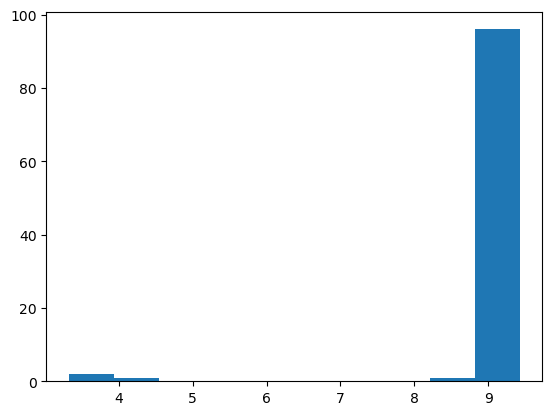

In [12]:
#UWAGA: przy przeklejaniu tego kodu, skopiuj też komórki 9/10
######################################################
query = "EKPDPHTKMHQYWLKPYELMEIYYQYRPFINFDQQMRVGLRCEA"
method = k_comparison
threshold = 5
##########################################################


#tworze dwie puste listy, otwieram plik database_p, przechodząc go linijka po linijce do "n" i "s" wpisuje nazwy i sekwencje

n = []
s = []
with open('database_p.txt', 'r') as f: #moze byc wymagane rowniez rozszerzenie txt (wtedy podmienic na database_p.txt)
    for line in f:  #przechodzimy po kazdej linijce
        line = line.rstrip() #tutaj strip() usuwa znaki konca linii (including "\n")
        if line.startswith('>'):
            n.append(line[1:])
        else:
            s.append(line)
            


#tworzę pustą listę, przechodze kolejne sekwencje z pliku i z uzyciem metody k-mer porownuje je z zapytaniem
ks = []
for i in range(len(n)):
    ks.append(method(query, s[i])) #wywoluje metode k-mer z k=3 dla zapytania i kolejnej sekwencji z pliku
    if method(query, s[i]) < threshold: #jezeli odleglosc jest mniejsza niz 5 to wyswietle te sekwencje
        print(n[i])
        print(s[i])
        print(method(query, s[i]))
        print()

#rysuje histogram        
plt.hist(ks)
plt.show()

<h4> Zadanie7: Wykonaj analogicznie obliczenia stosując tym razem metodę Lempel-Ziv. Załącz histogram do sprawozdania. Która sekwencja jest najbardziej podobna do zapytania?
  
<br>
    
* Uwaga: W przypadku metody Lempel-Ziv  odległości są z mniejszego zakresu; najczęściej (0,1), chociaż mogą go nieznacznie przekraczać.

<h4> Zadanie8: Rozważ następujące sekwencje

In [29]:
s1 = "CCCGCAATAAGTCGCCCGCGCACACCAGCAGCTCCGCGCAAGGGGCCTTAATCAATTGCTACCCCTACTTGGGCTACCTCCTTGCTGGAACTTGAAGGGA"
s2 = "CAATTGCTACCCCTACTTGGGCTACCTCCTTGCTGGAACTTGAAGGGACCCGCAATAAGTCGCCCGCGCACACCAGCAGCTCCGCGCAAGGGGCCTTAAT"

<h4> 

- Wykonaj dopasowanie tych sekwencji (za pomocą Clustal Omega, są to sekwencje DNA, wklej je w formacie FASTA)
- Porównaj te sekwencje za pomocą metody k-mer (k=5) oraz Lempel-Ziv. 
- Wygeneruj kilka sekwencji losowych, tej samej długości co s1. Za pomocą metody k-mer oraz Lempel-Ziv porównaj sekwencję s1 oraz te sekwencje (podobnie jak w poprzednim punkcie). Na tej podstawie stwierdź czy otrzymane odległości z poprzedniego punktu wskazują na duże bądź małe podobieństwo między sekwencjami.
- Dodatkowo, narysuj macierz kropkową (https://www.ebi.ac.uk/jdispatcher/seqstats/emboss_dotmatcher)
- Skomentuj otrzymane wyniki. Czy te sekwencje są do siebie podobne?

<h3> Biologiczne bazy danych

Wykorzystaj skrypty: zad9.py, zad10.py oraz zad11.py.

<h4>

Zadanie9: Odszukaj pracę o identyfikatorze 14697198 w bazie danych PubMed, a następnie odpowiedz na pytania:
- jaki jest tytuł tej pracy?
- w jakim czasopiśmie została wydana ta praca?
- ilu autorów odpowiada za tę prace?
- podaj przykładowe MeSH termy z tej pracy.


- Do poniższego zadania przyda się pubmed_tags.png (zamieszczone w materiałach).

<h4> Zadanie10: Zaproponuj hasło do wyszukania prac posiadających w tytule mRNA, opublikowanych w 2017 roku w czasopiśmie BMC Genomics. Ile jest takich prac?

Skrypt zad10b.py pozwala dodatkowo wyświetlić tytuły prac (lub inne informacje) dla danego zapytania.

<h4> Zadanie11: Z bazy Nucleotide pobierz sekwencje o następującach ID: NM_001012006.1, MK560199.1, AB046569.1. Zapisz je do jednego pliku w formacie FASTA, gdzie nazwa odpowiada organizmowi z którego dana sekwencja pochodzi [GBSeq_organism], natomiast sama sekwencja znajduje się w [GBSeq_sequence]. Dołącz do sprawozdania.